## 21BDS0340 - Abhinav Dinesh Srivatsa

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv("NaturalGas.csv")
data

,rownames,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,1,NY,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,2,NY,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,NY,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,4,NY,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,5,NY,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...,...,...,...,...
133,134,CA,5,1985,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,135,CA,5,1986,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,136,CA,5,1987,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,137,CA,5,1988,497138,5.64,8.69,34.02,5.26,2366,15340.38


### Module 2 - Data Transformations

In [3]:
# data deduplication
deduplicated = data.drop_duplicates()
deduplicated

,rownames,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,1,NY,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,2,NY,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,NY,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,4,NY,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,5,NY,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...,...,...,...,...
133,134,CA,5,1985,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,135,CA,5,1986,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,136,CA,5,1987,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,137,CA,5,1988,497138,5.64,8.69,34.02,5.26,2366,15340.38


In [4]:
# checking missing values
missing = data.isna().sum()
missing

rownames       0
state          0
statecode      0
year           0
consumption    0
price          0
eprice         0
oprice         0
lprice         0
heating        0
income         0
dtype: int64

In [5]:
# binning the year
pd.qcut(data.year, q=4, labels=["q1", "q2", "q3", "q4"])

0      q1
1      q1
2      q1
3      q1
4      q1
       ..
133    q4
134    q4
135    q4
136    q4
137    q4
Name: year, Length: 138, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

### Module 3 - Correlation ANalysis and Time Series Analysis

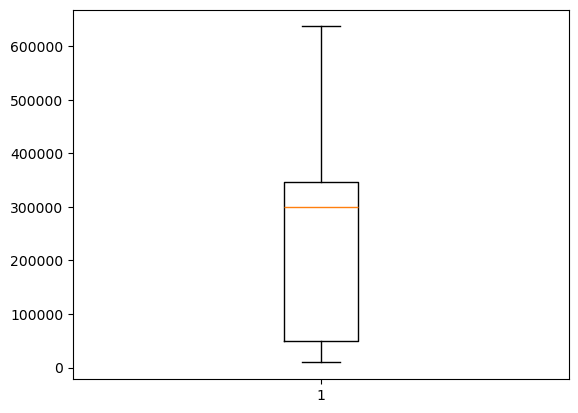

In [6]:
# univariate analysis
# checking consumption range
plt.boxplot(data.consumption)
plt.show()

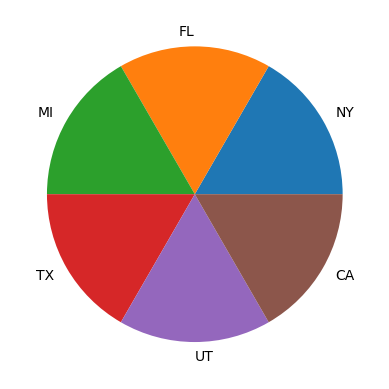

In [7]:
# checking pie chart of state
state_counts = data.state.value_counts()
plt.pie(state_counts, labels=state_counts.index)
plt.show()

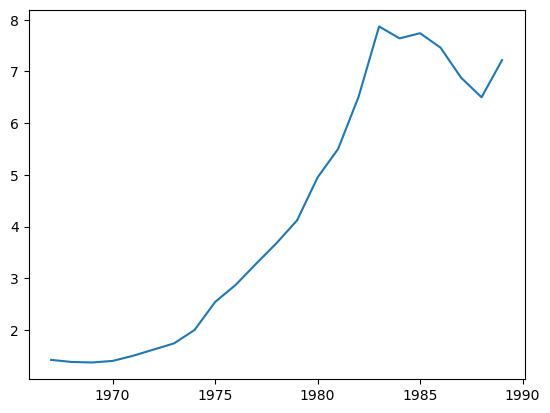

In [8]:
# bivariate analysis
# checking price vs. year for state NY
ny_data = data[data.state == "NY"]
plt.plot(ny_data.year, ny_data.price)
plt.show()

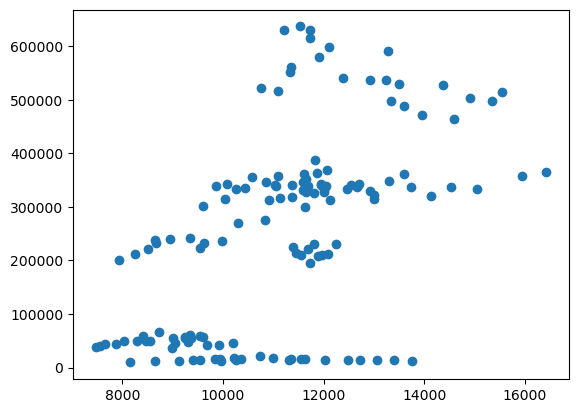

In [9]:
# checking income vs. consumption
plt.scatter(data.income, data.consumption)
plt.show()

<Axes: >

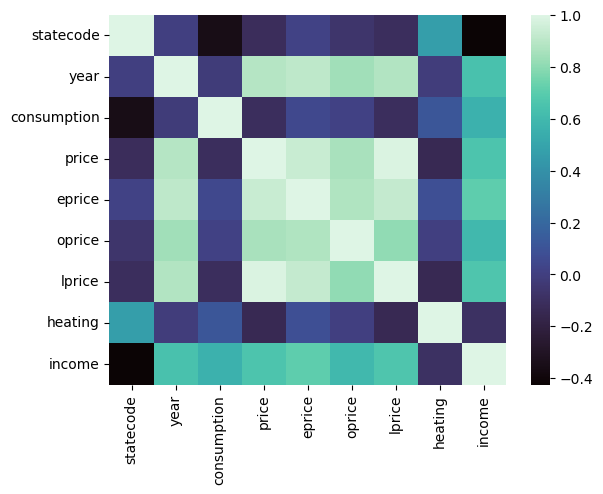

In [10]:
# multivariate analysis
numeric_data = data.drop(["rownames", "state"], axis=1)
sns.heatmap(numeric_data.corr(), cmap="mako")

In [11]:
# time series analysis
ts_data = data.copy()
ts_data.year = pd.to_datetime(ts_data.year, format="%Y")
ts_data.set_index("year", inplace=True)
ts_data

,rownames,state,statecode,consumption,price,eprice,oprice,lprice,heating,income
year,,,,,,,,,,
1967-01-01,1,NY,35,313656,1.42,2.98,7.40,1.47,6262,10903.75
1968-01-01,2,NY,35,319282,1.38,2.91,7.77,1.42,6125,11370.02
1969-01-01,3,NY,35,331326,1.37,2.84,7.96,1.38,6040,11578.68
1970-01-01,4,NY,35,346533,1.40,2.87,8.33,1.37,6085,11586.77
1971-01-01,5,NY,35,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...,...,...,...
1985-01-01,134,CA,5,527495,5.72,7.78,30.58,5.84,2694,14368.46
1986-01-01,135,CA,5,464307,5.14,7.95,44.15,5.72,2192,14580.77
1987-01-01,136,CA,5,503473,5.26,8.03,35.24,5.14,2502,14915.05


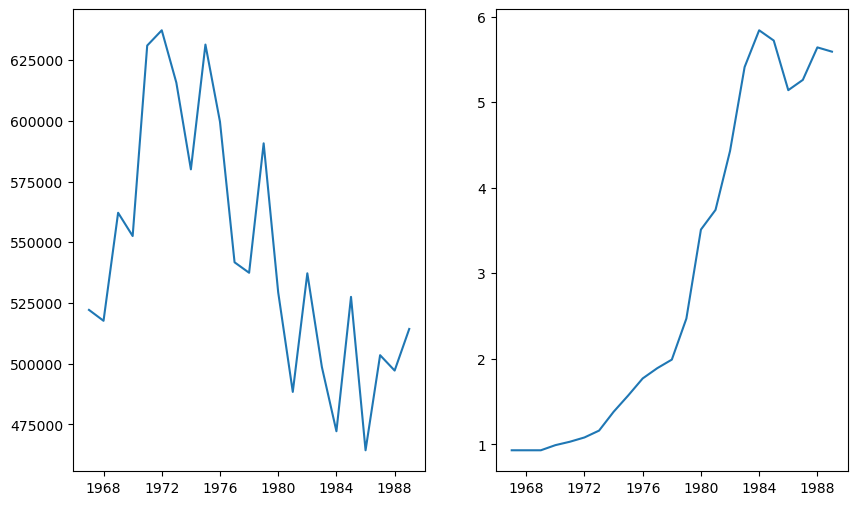

In [12]:
# plotting time series of consumption and price for state CA
ca_data = ts_data[ts_data.state == "CA"]
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(ca_data.consumption)
plt.subplot(1, 2, 2)
plt.plot(ca_data.price)
plt.show()

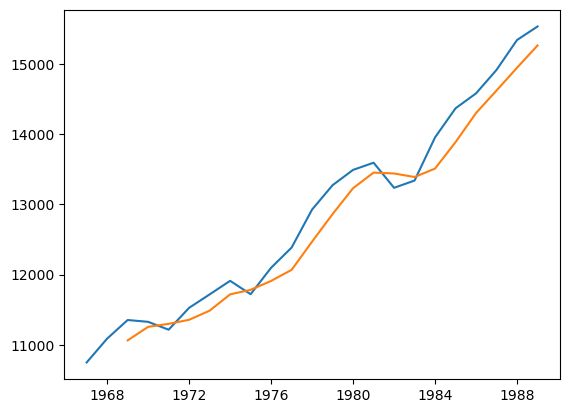

In [13]:
# moving average of income for state CA
ma = ca_data.income.rolling(window=3).mean()
plt.plot(ca_data.income)
plt.plot(ma)
plt.show()

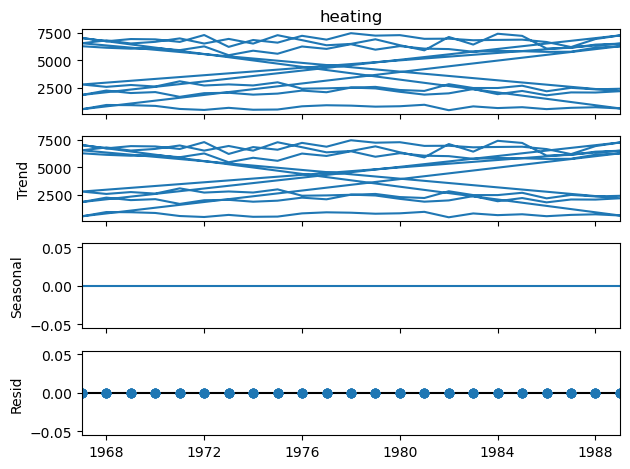

In [14]:
# seasonal decomposition of heating for state CA
decomposed = seasonal_decompose(ts_data.heating, model='additive', period=1)
decomposed.plot()
plt.show()

### Module 4 - Data Summarisation and Visualisation

In [15]:
# 1D statistical analysis
# basic metrics
data.describe()

,rownames,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
count,138.000000,138.00000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,69.500000,27.00000,1978.000000,252901.478261,3.422319,5.053551,24.635580,3.207681,4154.528986,11193.235652
std,39.981246,15.68811,6.657415,184478.131559,2.169215,2.577859,15.401018,2.124937,2451.998462,1906.726093
min,1.000000,5.00000,1967.000000,9430.000000,0.680000,1.980000,5.010000,0.680000,481.000000,7465.340000
25%,35.250000,10.00000,1972.000000,49103.500000,1.380000,2.432500,8.240000,1.257500,2081.500000,9637.165000
50%,69.500000,29.00000,1978.000000,300835.500000,2.775000,4.520000,19.865000,2.615000,4272.000000,11367.460000
75%,103.750000,44.00000,1984.000000,346428.750000,5.310000,7.282500,40.102500,5.192500,6498.000000,12125.335000
max,138.000000,45.00000,1989.000000,637289.000000,8.060000,10.860000,51.730000,7.870000,7440.000000,16425.330000


In [16]:
# kurtosis and skewness for consumption
kurt = data.consumption.kurt()
skew = data.consumption.skew()
print(f"{kurt}, {skew}")

-0.9746765850042207, 0.18689627507055256


In [17]:
# 2D statistical analysis
# correlation between consumption and income
c = data.consumption.corr(data.income)
print(f"{c}")

0.558558951233098


In [18]:
# covariance between price and income
c = data.price.cov(data.income)
print(f"{c}")

2723.491923294193


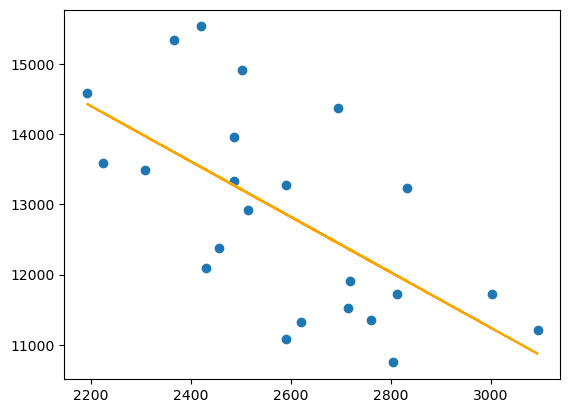

In [19]:
# linear regression between heating and income for state CA
lr = LinearRegression()
lr.fit(ca_data.heating.values.reshape(-1, 1), ca_data.income.values)
plt.scatter(ca_data.heating, ca_data.income)
plt.plot(ca_data.heating, lr.predict(ca_data.heating.values.reshape(-1, 1)), c="orange")
plt.show()

<BarContainer object of 138 artists>

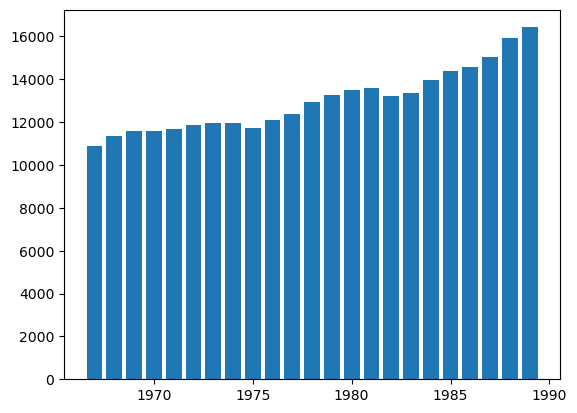

In [20]:
# bar plot between year and income
plt.bar(data.year, data.income)

### Module 5 - Clustering Algorithms

In [21]:
# preprocessing data for clustering
data.drop("rownames", axis=1, inplace=True)

le = LabelEncoder()
state_encoded = le.fit_transform(data.state)
data.state = state_encoded
le.classes_

array(['CA', 'FL', 'MI', 'NY', 'TX', 'UT'], dtype=object)

In [26]:
# reducing dimensions to plot
p = PCA(2)
reduced = p.fit_transform(data)

/Users/abhi/Programming/exploratory-data-analysis/env/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


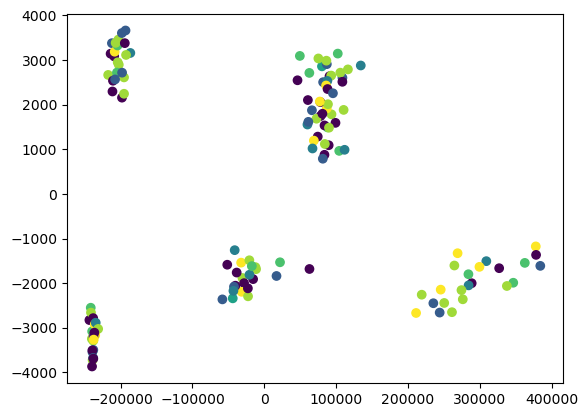

In [31]:
# spectral clustering
sc = SpectralClustering()
clusters = sc.fit_predict(data)

plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters)
plt.show()

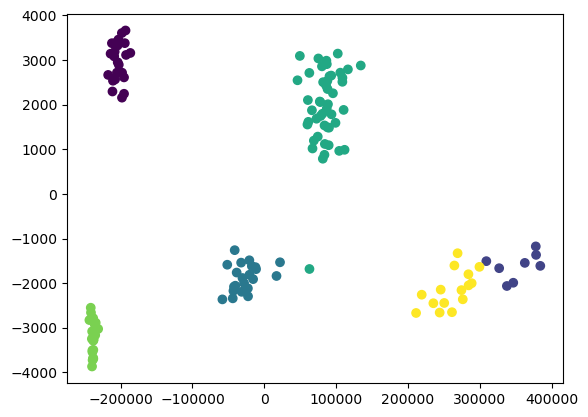

In [34]:
# k-means clustering
km = KMeans(6)
clusters = km.fit_predict(data)

plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters)
plt.show()

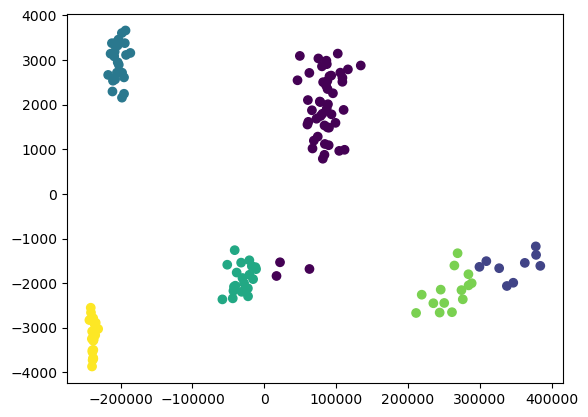

In [38]:
# agglomerative clustering
ac = AgglomerativeClustering(6, linkage="ward")
clusters = ac.fit_predict(data)

plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters)
plt.show()

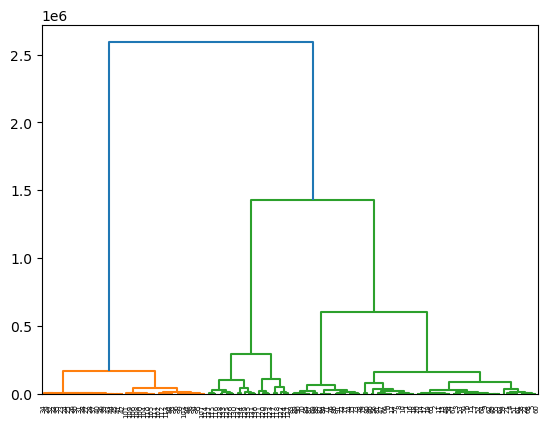

In [42]:
# dendrogram
links = linkage(data, method="ward")
dendrogram(links, show_leaf_counts=False)
plt.show()

### Module 6 - Dimensionality Reduction

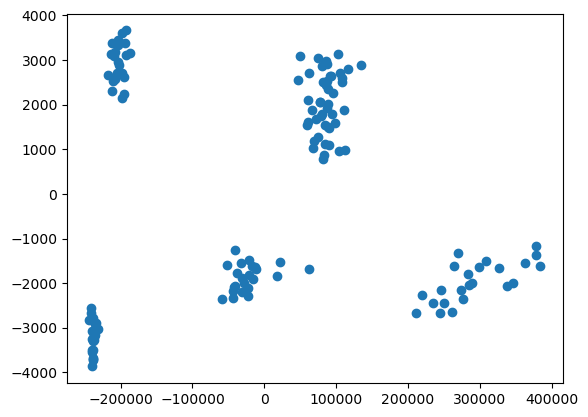

In [45]:
# principle component analysis - reducing to 2D
p = PCA(2)
reduced = p.fit_transform(data)

plt.scatter(reduced[:, 0], reduced[:, 1])
plt.show()

In [54]:
# singular value decomposition
U, S, VT = np.linalg.svd(data)
U.shape, S.shape, VT.shape

((138, 138), (10,), (10, 10))

In [61]:
# reconstructing from singluar value decomposition
S_mat = np.zeros(data.shape)
np.fill_diagonal(S_mat, S)
reconstructed = np.dot(U, np.dot(S_mat, VT))
pd.DataFrame(reconstructed)

,0,1,2,3,4,5,6,7,8,9
0,3.000000e+00,35.0,1967.0,313656.0,1.42,2.98,7.40,1.47,6262.0,10903.75
1,3.000000e+00,35.0,1968.0,319282.0,1.38,2.91,7.77,1.42,6125.0,11370.02
2,3.000000e+00,35.0,1969.0,331326.0,1.37,2.84,7.96,1.38,6040.0,11578.68
3,3.000000e+00,35.0,1970.0,346533.0,1.40,2.87,8.33,1.37,6085.0,11586.77
4,3.000000e+00,35.0,1971.0,352085.0,1.50,3.07,8.80,1.40,5907.0,11657.42
...,...,...,...,...,...,...,...,...,...,...
133,1.043889e-13,5.0,1985.0,527495.0,5.72,7.78,30.58,5.84,2694.0,14368.46
134,7.311560e-14,5.0,1986.0,464307.0,5.14,7.95,44.15,5.72,2192.0,14580.77
135,7.602678e-14,5.0,1987.0,503473.0,5.26,8.03,35.24,5.14,2502.0,14915.05
136,5.850017e-14,5.0,1988.0,497138.0,5.64,8.69,34.02,5.26,2366.0,15340.38


In [59]:
# comparing it to original data
data

,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,3,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,3,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,3,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,3,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...,...,...,...
133,0,5,1985,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,0,5,1986,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,0,5,1987,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,0,5,1988,497138,5.64,8.69,34.02,5.26,2366,15340.38
